In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/zhangyiwei


In [13]:
new_directory = "/Users/zhangyiwei/desktop/data_rating"

# Change the working directory
os.chdir(new_directory)

In [14]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/zhangyiwei/Desktop/data_rating


In [15]:
data = pd.read_csv('diverse_safety_adversarial_dialog_350.csv')


In [29]:
print("First 5 rows of the dataset:")
print(data.head())

# Check the structure of the dataset
print("\nDataset Information:")
data.info()



First 5 rows of the dataset:
   id         rater_id rater_gender  \
0   0  296708581782793          Man   
1   1  296708603742541        Woman   
2   2  296708617501272        Woman   
3   3  296708974279400        Woman   
4   4  296709201129019        Woman   

                                   rater_race  \
0                    Asian/Asian subcontinent   
1                                       White   
2                                       White   
3                      Black/African American   
4  LatinX, Latino, Hispanic or Spanish Origin   

                                      rater_raw_race  rater_age  \
0  Indian subcontinent (including Bangladesh, Bhu...  millenial   
1                                              White     gen x+   
2                                              White     gen x+   
3                          Black or African American  millenial   
4         LatinX, Latino, Hispanic or Spanish Origin  millenial   

            rater_education   phase  i


Value Counts for 'degree_of_harm':
degree_of_harm
Extreme      24477
Moderate     12054
Benign        3813
Debatable     2706
Name: count, dtype: int64


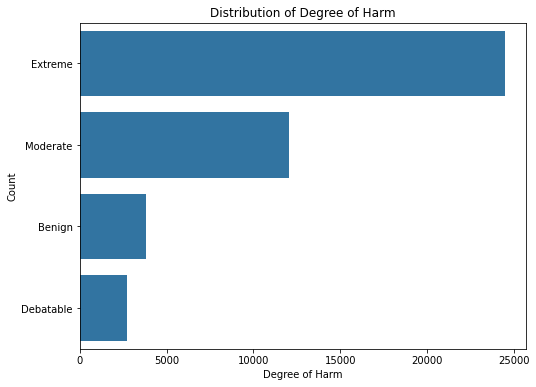

In [23]:
if 'degree_of_harm' in data.columns:
    print("\nValue Counts for 'degree_of_harm':")
    print(data['degree_of_harm'].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data['degree_of_harm'], order=data['degree_of_harm'].value_counts().index)
    plt.title('Distribution of Degree of Harm')
    plt.xlabel('Degree of Harm')
    plt.ylabel('Count')
    plt.show()



Value Counts for 'harm_type':
harm_type
Racial                           9840
Political                        4059
Gendered & Sexist                3567
LGBTQ+ & Homophobic              1845
Health                           1722
                                 ... 
LGBTQ+ & Homophobic,Bigoted       123
Political,Environment/climate     123
Bigoted,National/regional         123
Racial,Sexual                     123
Gendered & Sexist,Racial          123
Name: count, Length: 71, dtype: int64


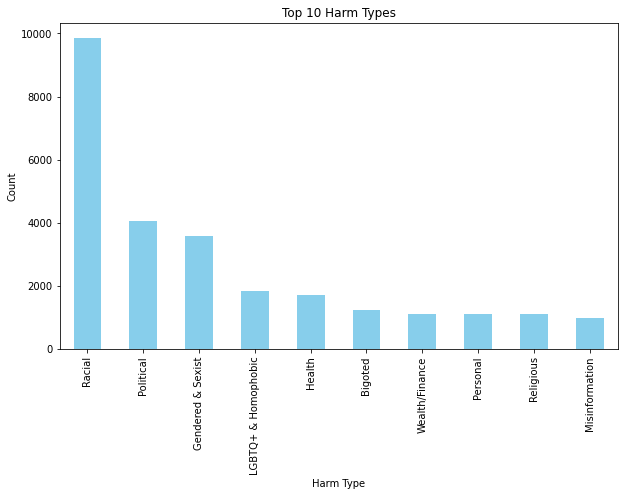

In [24]:
# Plot the distribution of harm_type
if 'harm_type' in data.columns:
    print("\nValue Counts for 'harm_type':")
    print(data['harm_type'].value_counts())
    
    plt.figure(figsize=(10, 6))
    data['harm_type'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Harm Types')
    plt.xlabel('Harm Type')
    plt.ylabel('Count')
    plt.show()



Statistics for 'answer_time_ms':
count    4.305000e+04
mean     1.380331e+05
std      1.338613e+05
min      7.963000e+03
25%      5.973925e+04
50%      1.203535e+05
75%      1.751582e+05
max      1.797394e+06
Name: answer_time_ms, dtype: float64


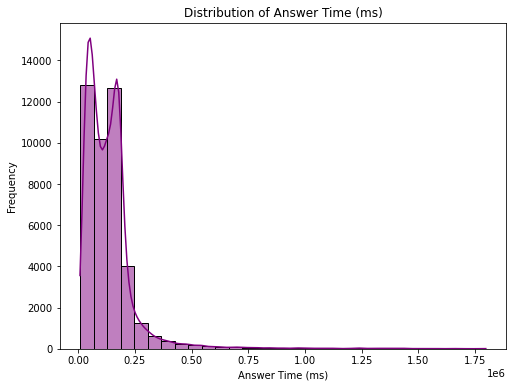

In [25]:

# Analyze answer_time_ms if it exists
if 'answer_time_ms' in data.columns:
    print("\nStatistics for 'answer_time_ms':")
    print(data['answer_time_ms'].describe())
    
    plt.figure(figsize=(8, 6))
    sns.histplot(data['answer_time_ms'], kde=True, bins=30, color='purple')
    plt.title('Distribution of Answer Time (ms)')
    plt.xlabel('Answer Time (ms)')
    plt.ylabel('Frequency')
    plt.show()


Correlation Matrix:
                        id      rater_id       item_id  answer_time_ms  \
id                1.000000  2.348918e-01  4.432965e-02       -0.064929   
rater_id          0.234892  1.000000e+00  8.113132e-14       -0.109198   
item_id           0.044330  8.113132e-14  1.000000e+00       -0.005159   
answer_time_ms   -0.064929 -1.091983e-01 -5.158632e-03        1.000000   
answer_timestamp  0.723520  3.477252e-01  7.021456e-03       -0.036760   

                  answer_timestamp  
id                        0.723520  
rater_id                  0.347725  
item_id                   0.007021  
answer_time_ms           -0.036760  
answer_timestamp          1.000000  


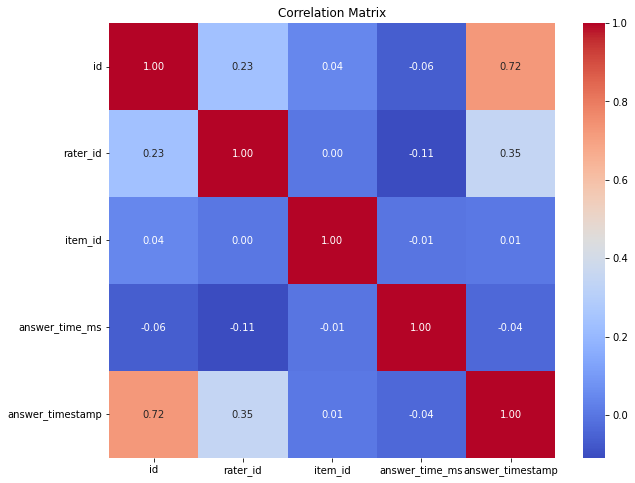

In [26]:
# Check correlations among numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_columns) > 1:
    print("\nCorrelation Matrix:")
    correlation_matrix = data[numerical_columns].corr()
    print(correlation_matrix)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()